## Importing Required Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

## Checking Directories

In [ ]:
cv2.imread('train/glass/glass147.jpg').shape

## Generator

In [2]:
train = ImageDataGenerator(rescale = 1/255,shear_range = 0.2, zoom_range = 0.2, 
                           brightness_range = (0.1, 0.5), horizontal_flip=True)

In [36]:
train_dataset = train.flow_from_directory('train',
                                         target_size = (200, 200),
                                         batch_size = 8,
                                         class_mode = 'categorical')

Found 6750 images belonging to 5 classes.


In [37]:
train_dataset.class_indices

{'compost': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

## Model

In [38]:
vgg16 = VGG16(input_shape = (200, 200, 3), weights = "imagenet", include_top = False)

In [39]:
for layer in vgg16.layers:
    layer.trainable = False

In [40]:
x = layers.Flatten()(vgg16.output)

In [41]:
prediction = layers.Dense(units = 5, activation="sigmoid")(x)
model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

## Compiling and Fitting Model

In [42]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])
result = model.fit_generator(train_dataset, epochs = 7, steps_per_epoch=256)

Epoch 1/7
256/256 [==============================] - 274s 1s/step - loss: 1.5703 - accuracy: 0.4192
Epoch 2/7
256/256 [==============================] - 299s 1s/step - loss: 1.1585 - accuracy: 0.5735
Epoch 3/7
256/256 [==============================] - 294s 1s/step - loss: 1.0832 - accuracy: 0.5971
Epoch 4/7
256/256 [==============================] - 294s 1s/step - loss: 0.9645 - accuracy: 0.6364
Epoch 5/7
256/256 [==============================] - 294s 1s/step - loss: 1.0062 - accuracy: 0.6391
Epoch 6/7
256/256 [==============================] - 292s 1s/step - loss: 0.8943 - accuracy: 0.6709
Epoch 7/7
256/256 [==============================] - 294s 1s/step - loss: 0.8728 - accuracy: 0.6778


## Prediction

In [44]:
from tensorflow.keras.preprocessing import image
output_class = ['compost', 'glass', 'metal', 'paper', 'plastic']
dir_path = 'test'
def waste_prediction(new_image):
#for i in os.listdir(dir_path):
    test_image = image.load_img(new_image, target_size = (200,200))
    plt.axis("off")
    plt.imshow(test_image)
    plt.show()
 
    test_image = image.img_to_array(test_image) / 255
    test_image = np.expand_dims(test_image, axis=0)

    predicted_array = model.predict(test_image)
    predicted_value = output_class[np.argmax(predicted_array)]
    predicted_accuracy = round(np.max(predicted_array) * 100, 2)

    print(predicted_value, " with ", predicted_accuracy, " % accuracy")

## Webcam Stuff

In [ ]:
cap = cv2.VideoCapture(0)
cap.set(3,200) #Camera Parameter
cap.set(4,200)
#count=1
while True:
    success, web = cap.read()
    cv2.imshow("Web Cam",web)
    path = 'test1'
    k = cv2.waitKey(1)
    #if k%256 == 27:
     #   break
    if k%256 == 32:
        cv2.imwrite(os.path.join(path , 'imgT.jpg'),web)
        print('taken')
        break
cap.release()
cv2.destroyAllWindows()

## Results

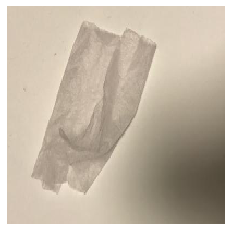

paper  with  91.38  % accuracy


In [50]:
dir_path = 'test'
waste_prediction('test/trash90.jpg')

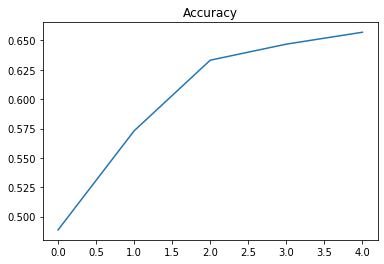

In [27]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

In [28]:
model.save("WasteClassification.h5")